# Finding and understanding relationships in data

In today's data-driven world, we are constantly bombarded with vast amounts of information. However, this raw data is often meaningless without the ability to identify relationships and patterns within it.

Finding and understanding relationships in data is crucial for making informed decisions, developing predictive models, and discovering new insights. Through the use of statistical techniques and machine learning algorithms, we can uncover hidden connections and dependencies between variables, enabling us to make accurate predictions and improve our understanding of complex systems.

Whether in business, science, or everyday life, the ability to analyze and interpret data is becoming increasingly important, and finding relationships within it is an essential skill for success.

## How To

In [1]:
import pandas as pd
df = pd.read_csv("data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [3]:
df.total_rooms.corr(df.households)

0.918484492654308

## More than linear correlation

In [6]:
from discover_feature_relationships import discover

In [8]:
rel = discover.discover(df.sample(500))

In [13]:
beyond_corr = rel.pivot(index="target", columns="feature", values="score").fillna(1)
beyond_corr

feature,households,housing_median_age,latitude,longitude,median_house_value,median_income,ocean_proximity,population,total_bedrooms,total_rooms
target,,,,,,,,,,
households,1.000000,-0.033117,-0.228332,-0.238521,-0.480431,-0.709492,-0.031046,0.699291,0.863313,0.600059
housing_median_age,-0.199505,1.000000,-0.160107,-0.014596,-0.390111,-0.633636,0.100260,-0.309690,-0.194402,-0.188262
latitude,-0.461125,-0.183543,1.000000,0.888194,-0.508373,-0.334582,0.306464,-0.469055,-0.438501,-0.509540
longitude,-0.437815,-0.177413,0.890404,1.000000,-0.492650,-0.405772,0.235745,-0.411796,-0.471071,-0.438698
median_house_value,-0.565020,-0.111878,0.012224,0.024717,1.000000,0.202577,0.252519,-0.497250,-0.512489,-0.521057
median_income,-0.530908,-0.145296,-0.189408,-0.266740,0.388039,1.000000,0.031145,-0.463054,-0.556742,-0.395826
ocean_proximity,-0.509021,-0.131888,0.300799,0.332452,-0.232148,-0.442405,1.000000,-0.455126,-0.387747,-0.330846
population,0.752003,-0.093880,-0.218145,-0.279517,-0.374136,-0.692641,-0.023753,1.000000,0.597323,0.573640
total_bedrooms,0.804482,-0.009149,-0.155362,-0.034428,-0.386696,-0.664100,-0.020268,0.437710,1.000000,0.776632


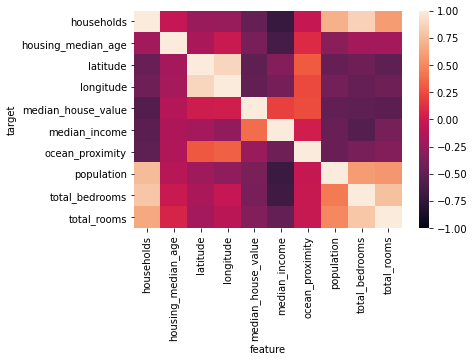

In [16]:
import seaborn as sns
sns.heatmap(beyond_corr, vmin=-1, vmax=1)

## Exercise

## Additional Resources

- [Real Python on Correlation](https://realpython.com/numpy-scipy-pandas-correlation-python/)
- [Beyond Correlation](https://github.com/ianozsvald/beyond_correlation)